<a href="https://colab.research.google.com/github/Pradeep18102003/Encryptix-1/blob/main/Spam_SMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing the Libraries**

In [70]:
import numpy as np
import pandas as pd

# **Importing the dataset**

In [71]:
df = pd.read_csv('spam.csv', encoding='Latin-1')
df = df.dropna(how="any", axis=1)
df.columns = ['target', 'message']
df.head()

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


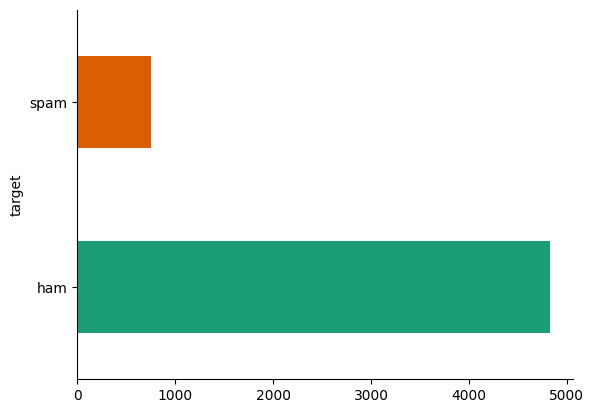

In [72]:
# @title target

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('target').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# **Data Preprocessing**

# **Cleaning the corpus**

In [73]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
def cleantext(text):
  text = str(text).lower()
  text = re.sub('https?:\/\/\S+ | www\.\S+', '', text)
  text = re.sub('[^a-zA-Z]', ' ', text)
  text = re.sub('<.*?>+', ' ', text)
  text = re.sub(' +', ' ', text)
  text = re.sub('\n', ' ', text)
  text = text.split()
  text = [ps.stem(word) for word in text if word not in stopwords.words('english')]
  text = ' '.join(text)
  return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [74]:
df['message'] = df['message'].apply(cleantext)
df.head()

,target,message
0,ham,go jurong point crazi avail bugi n great world...
1,ham,ok lar joke wif u oni
2,spam,free entri wkli comp win fa cup final tkt st m...
3,ham,u dun say earli hor u c alreadi say
4,ham,nah think goe usf live around though


# **Splitting the data into input and output**

In [75]:
x = df['message']
y = df['target']

# **Target Encoding**

In [76]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# **Splitting into training and test set**

In [77]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# **Modeling**

In [78]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
Model_1 =  Pipeline([
    ('vectorizer', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('model', MultinomialNB())
])
Model_2 =  Pipeline([
    ('vectorizer', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('model', LogisticRegression())
])
Model_3 =  Pipeline([
    ('vectorizer', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('model', SVC())
])

Model_1.fit(x_train, y_train)
Model_2.fit(x_train, y_train)
Model_3.fit(x_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('tfidf', TfidfTransformer()), ('model', SVC())])

In [79]:
y_pred_1 = Model_1.predict(x_test)

In [80]:
y_pred_2 = Model_2.predict(x_test)

In [81]:
y_pred_3 = Model_3.predict(x_test)

In [82]:
print(accuracy_score(y_test, y_pred_1))
print(accuracy_score(y_test, y_pred_2))
print(accuracy_score(y_test, y_pred_3))

0.9551569506726457
0.9614349775784753
0.9739910313901345


# **Confusion matrix**

In [83]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
print(confusion_matrix(y_test, y_pred_1))
print(confusion_matrix(y_test, y_pred_2))
print(confusion_matrix(y_test, y_pred_3))

[[948   1]
 [ 49 117]]
[[948   1]
 [ 42 124]]
[[947   2]
 [ 27 139]]


<function matplotlib.pyplot.show(close=None, block=None)>

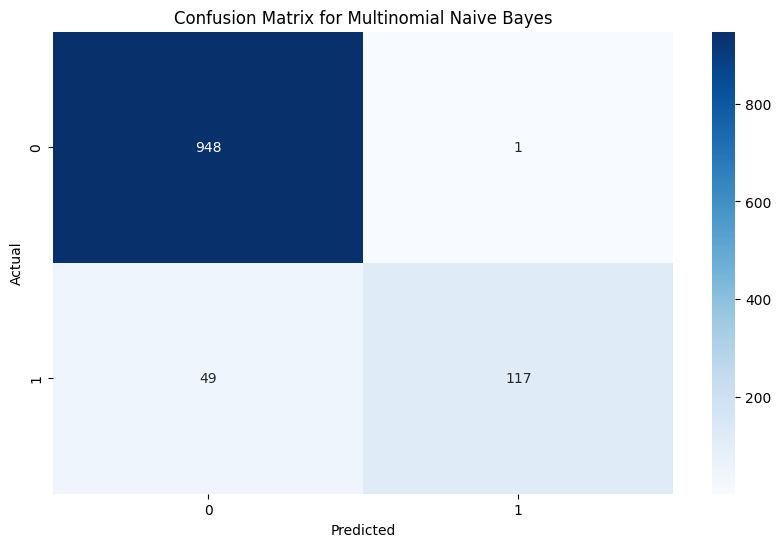

In [85]:
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_1), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Multinomial Naive Bayes')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

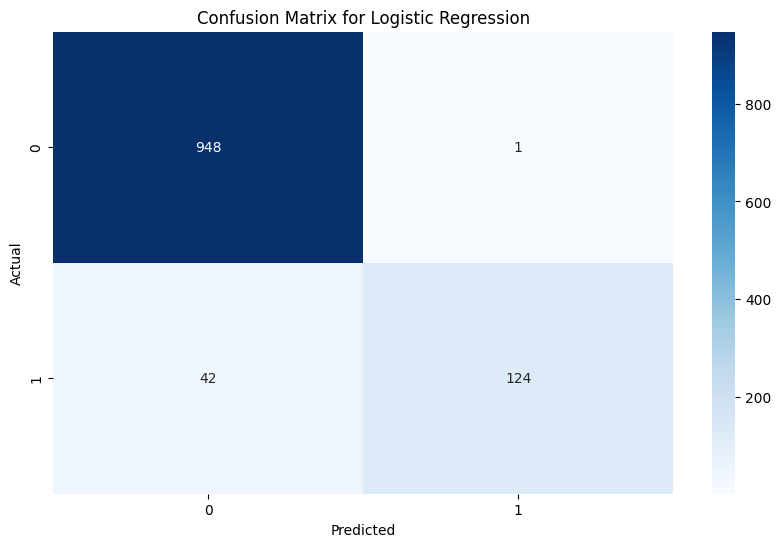

In [86]:
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_2), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

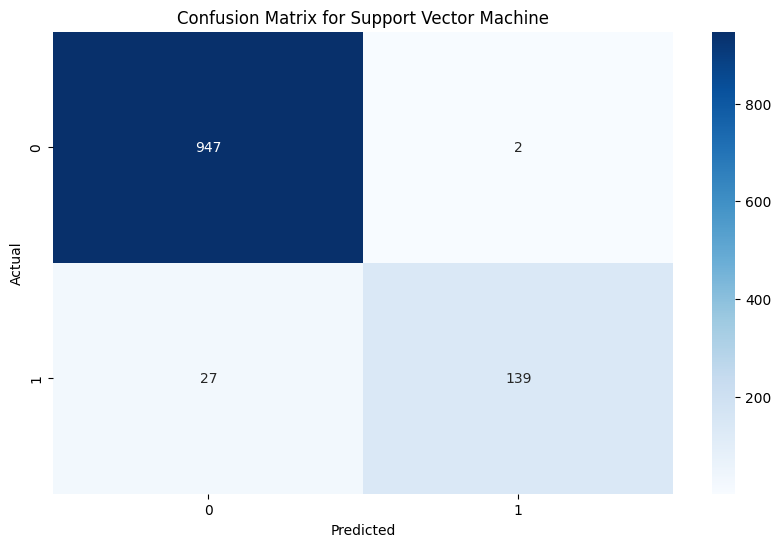

In [87]:
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_3), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Support Vector Machine')
plt.show